In [4]:
import sys
sys.path.insert(1, '../')
import numpy as np
import util.io as io
import matplotlib.pyplot as plt
from nufft import *
from util.fft import *
from scipy import interpolate
from tqdm.notebook import tqdm

In [5]:
gridsize = 256
trajpath = '../lib/resource/data/spiral_1slice_1cha/kspacelocation.crd'
trajectory = io.getCrd(trajpath)
trajectory = np.moveaxis(trajectory, 0, -1)
datapath = '../lib/resource/data/spiral_1slice_1cha/spiral.dat'
data = np.squeeze(io.getData(datapath)) 

In [7]:
ns = len(trajectory)
dcf = pipedcf(trajectory, ns)
mat = np.zeros([gridsize, gridsize], dtype=complex)
mat = gridding(mat, data, trajectory, dcf)

  0%|          | 0/10 [00:00<?, ?it/s]

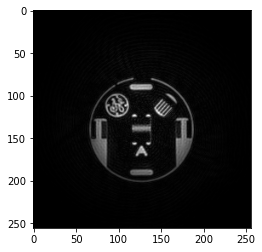

In [8]:
show(ifft2c(mat))

In [9]:
gridsize = 512
trajpath = '../lib/resource/data/spiral_1slice_1cha/kspacelocation.crd'
trajectory = io.getCrd(trajpath)
trajectory = np.moveaxis(trajectory, 0, -1)
datapath = '../lib/resource/data/spiral_1slice_1cha/spiral.dat'
data = np.squeeze(io.getData(datapath)) 

In [10]:
ns = len(trajectory)
dcf = pipedcf(trajectory, ns)
mat = np.zeros([gridsize, gridsize], dtype=complex)
mat = gridding(mat, data, trajectory, dcf)

  0%|          | 0/10 [00:00<?, ?it/s]

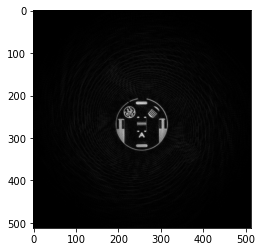

In [11]:
show(ifft2c(mat))